In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Salary_Data_Based_country_and_race.csv') #Lectura de los datos 

In [3]:
data.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [4]:
data.columns.values #Valores de las columnas 

array(['Unnamed: 0', 'Age', 'Gender', 'Education Level', 'Job Title',
       'Years of Experience', 'Salary', 'Country', 'Race'], dtype=object)

## Cuantos valores nulos hay en cada columna 
Como son pocos podemos eliminarlos 

In [5]:
def null_values(data,lista): #Funcion para saber cuantos valores nulos hay en cada columna
    null_val = []
    for item in lista:

        null_val.append(pd.isnull(data[item]).values.ravel().sum()) 
        #Agrega a una lista los valores nulos de cada columna

    return null_val

lista = np.array(['Unnamed: 0', 'Age', 'Gender', 'Education Level', 'Job Title',
       'Years of Experience', 'Salary', 'Country', 'Race'])
#Lista con los nombres de cada columna

valores_nulos = null_values(data,lista)
print('Los valores nulos en cada columna son: ', valores_nulos)

Los valores nulos en cada columna son:  [0, 2, 2, 3, 2, 3, 5, 0, 0]


Los datos de la caracteristica 'Job Title' son muchos pero una gran parte de cada variable se repite solo una vez o muy pocas veces. 

In [6]:
list_jt = []
print(pd.get_dummies(data['Job Title']).columns.values.shape)
for job in pd.get_dummies(data['Job Title']).columns.values:
    list_jt.append(np.count_nonzero(data['Job Title'] == job))
list_jt = pd.DataFrame({'Job': list_jt})
print(list_jt)


(193,)
     Job
0      1
1      1
2      2
3    244
4      2
..   ...
188    1
189    1
190    1
191    1
192   87

[193 rows x 1 columns]


Hacemos que las variables que tienen menos de 15 datos sean NaN para eliminarlos despues ya que estos con pocos datos serian muy dificiles de predecir por el algoritmo.

In [7]:
job2 = data['Job Title'].copy()
data_n = data.copy()

Hacemos que los trabajos que se repiten menos de 15 veces sean NaN

In [8]:
for i in range(list_jt.shape[0]):
    if list_jt.iloc[i].item() <= 0:
        data_n['Job Title'] = data_n['Job Title'].replace(pd.get_dummies(job2).columns.values[i], None)

In [9]:
print(data_n['Job Title'].value_counts())

Job Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Supply Chain Analyst            1
Name: count, Length: 193, dtype: int64


In [16]:
data_n['Job Title'].values

array(['Software Engineer', 'Data Analyst', 'Senior Manager', ...,
       'Financial Manager', 'Marketing Manager', 'Sales Executive'],
      dtype=object)

In [11]:
from collections import Counter

# Supongamos que tienes un array de frases llamado 'frases'
frases = data_n['Job Title'].values

# Combina todas las frases en un solo string
texto_completo = ' '.join(frases)

# Convierte el texto a minúsculas para evitar distinciones entre mayúsculas y minúsculas
texto_completo = texto_completo.lower()

# Divide el texto en palabras
palabras = texto_completo.split()

# Utiliza Counter para contar la frecuencia de cada palabra
frecuencia_palabras = Counter(palabras)

# Imprime las palabras más comunes y su frecuencia
print("Palabras más comunes:")
for palabra, frecuencia in frecuencia_palabras.most_common():
    print(f"{palabra}: {frecuencia} veces")


TypeError: sequence item 172: expected str instance, float found

# Creamos una nueva columna 
En la caracteristica 'Job Title' un mismo trabajo se repite hasta 3 veces con el prefijo 'Junior', 'Senior' o sin el. Aqui clasificaremos este prefijo. 

In [ ]:
data_n['Job class'] = data_n['Job Title']
def classification(name):
    data_n[name] = data_n['Job Title']
    job = pd.get_dummies(data_n['Job Title']).columns.values
    for i in job:
        if name in i:
            data_n[name] = data_n[name].replace(i, 1)
        else:
            data_n[name] = data_n[name].replace(i, 0)

In [ ]:
name = ['Developer', 'Scientist', 'Engineer', 'Sales', 'Marketing', 'Director', 'Manager', 'Senior', 
        'HR' or 'Human Resources', 'Coordinator', 'Project', 'Designer', 'Software', 'Junior', 'Analyst', 'Data']
for elem in name:
    classification(elem)
data_n

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Job class,...,Manager,Senior,HR,Coordinator,Project,Designer,Software,Junior,Analyst,Data
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White,Software Engineer,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic,Data Analyst,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White,Senior Manager,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic,Sales Associate,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian,Director,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed,Director of Marketing,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian,Sales Associate,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese,Financial Manager,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean,Marketing Manager,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_1 = []
x_2 = []
x_3 = []
for i in job:
    if 'Senior' in i:
        x_1.append(i)
    elif 'Junior' in i:
        x_2.append(i)
    else:
        x_3.append(i)


In [ ]:
data_new = data_n.copy()

Habia varios valores con el mismo significado en la caracteristica 'Education Level', asi que en esta linea lo resolvemos. Tambien se ordenaron para que vayan de menor a mayor grado academico

In [ ]:
print(pd.get_dummies(data_new['Education Level']).columns.values)
data_new['Education Level'] = data_new['Education Level'].replace(['phD'], ['PhD'])
data_new['Education Level'] = data_new['Education Level'].replace(["Bachelor's Degree"], ["Bachelor's"])
data_new['Education Level'] = data_new['Education Level'].replace(["Master's Degree"], ["Master's"])
data_new['Education Level'] = data_new['Education Level'].replace(["High School"], ["1High School"])
print(pd.get_dummies(data_new['Education Level']).columns.values)

["Bachelor's" "Bachelor's Degree" 'High School' "Master's"
 "Master's Degree" 'PhD' 'phD']
['1High School' "Bachelor's" "Master's" 'PhD']


## Cambiar strings por numeros 

In [ ]:

def change_values(data1):
#Funcion para cambiar los valores de las columnas por numeros 

    columnas = []
    for item in data1.columns.values:
        if data1[item].dtypes == 'object':
            columnas.append(item)
    #Esta parte crea una lista con valores que no sean floats o integer
            
    for item in columnas:
        valores_columnas = pd.get_dummies(data1[item]).columns.values #Crea una lista cada valor distinto en cada columna
        x = [i for i in range(valores_columnas.shape[0])] #Crea una lista de numeros del 0 hasta la longitud de valores_columnas
        data1[item] = data1[item].replace(valores_columnas, x) #Intercambia los valores
    
    return data1

In [ ]:
change_values(data_new)

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Job class,...,Manager,Senior,HR,Coordinator,Project,Designer,Software,Junior,Analyst,Data
0,0,32.0,1.0,1.0,177.0,5.0,90000.0,3,9,177.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,28.0,0.0,2.0,18.0,3.0,65000.0,4,5,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,2,45.0,1.0,3.0,145.0,15.0,150000.0,1,9,145.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,36.0,0.0,1.0,116.0,7.0,60000.0,4,5,116.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,52.0,1.0,2.0,26.0,20.0,200000.0,4,1,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,0.0,3.0,34.0,20.0,200000.0,3,7,34.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6700,6700,32.0,1.0,0.0,116.0,3.0,50000.0,0,2,116.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6701,6701,30.0,0.0,1.0,42.0,4.0,55000.0,2,4,42.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6702,6702,46.0,1.0,2.0,97.0,14.0,140000.0,2,6,97.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.get_dummies(data_new['Gender']).columns.values

array([0., 1., 2.])

La caracteristica 'Gender' tiene 3 valores, lo ideal seria tener dos asi que para que sea un cambio valido necesitamos que sean pocos datos con este valor 

In [ ]:
print(pd.get_dummies(data['Gender']).columns.values)
print('El numero de veces que aparece Other es', np.count_nonzero(data['Gender'] == 'Other'))
data_new['Gender'] = data_new['Gender'].replace(2., None) #La variable Other fue ajustada tal que Other == 2., y aqui se reemplaza por NaN



['Female' 'Male' 'Other']
El numero de veces que aparece Other es 14


Eliminamos los datos que no necesitamos o podemos prescindir

In [ ]:
data2 = data_new.copy()
data2 = data2.dropna(axis=0,how="any") #Elimina todos los NaN
data2 = data2.drop('Unnamed: 0', axis = 1) #Elimina la primera columna 
data2

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Job class,Developer,...,Manager,Senior,HR,Coordinator,Project,Designer,Software,Junior,Analyst,Data
0,32.0,1.0,1.0,177.0,5.0,90000.0,3,9,177.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,28.0,0.0,2.0,18.0,3.0,65000.0,4,5,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,45.0,1.0,3.0,145.0,15.0,150000.0,1,9,145.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36.0,0.0,1.0,116.0,7.0,60000.0,4,5,116.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52.0,1.0,2.0,26.0,20.0,200000.0,4,1,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,49.0,0.0,3.0,34.0,20.0,200000.0,3,7,34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6700,32.0,1.0,0.0,116.0,3.0,50000.0,0,2,116.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6701,30.0,0.0,1.0,42.0,4.0,55000.0,2,4,42.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6702,46.0,1.0,2.0,97.0,14.0,140000.0,2,6,97.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data2.describe()

,Age,Education Level,Job Title,Years of Experience,Salary,Country,Race,Job class,Developer,Scientist,...,Manager,Senior,HR,Coordinator,Project,Designer,Software,Junior,Analyst,Data
count,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,...,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000
mean,33.610563,1.622382,95.141083,8.077723,115307.175194,2.007780,4.869390,95.141083,0.123878,0.095452,...,0.262867,0.143477,0.032017,0.039198,0.053561,0.016457,0.205566,0.085727,0.093058,0.144973
std,7.595994,0.880474,58.905403,6.029305,52806.810881,1.416941,3.386053,58.905403,0.329467,0.293860,...,0.440223,0.350585,0.176058,0.194080,0.225166,0.127235,0.404145,0.279982,0.290536,0.352100
min,21.000000,0.000000,0.000000,0.000000,350.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.000000,43.000000,3.000000,70000.000000,1.000000,1.000000,43.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.000000,1.000000,97.000000,7.000000,115000.000000,2.000000,5.000000,97.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,2.000000,159.000000,12.000000,160000.000000,3.000000,9.000000,159.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,62.000000,3.000000,192.000000,34.000000,250000.000000,4.000000,9.000000,192.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns


## Vista general de los datos 
Mediante seaborn hacemos un histograma para cada una de las caracteristicas para asi observar su forma, su distribucion y si hay algo que sea de relevancia.  \\ 

Las variables 'Age', 'Salary' y 'Years of Experience' son las unicas que aparentan seguir una distribucion. Las otras solo conforman un conjunto de datos cuantitativos que no siguen ninguna estructura estadistica. 


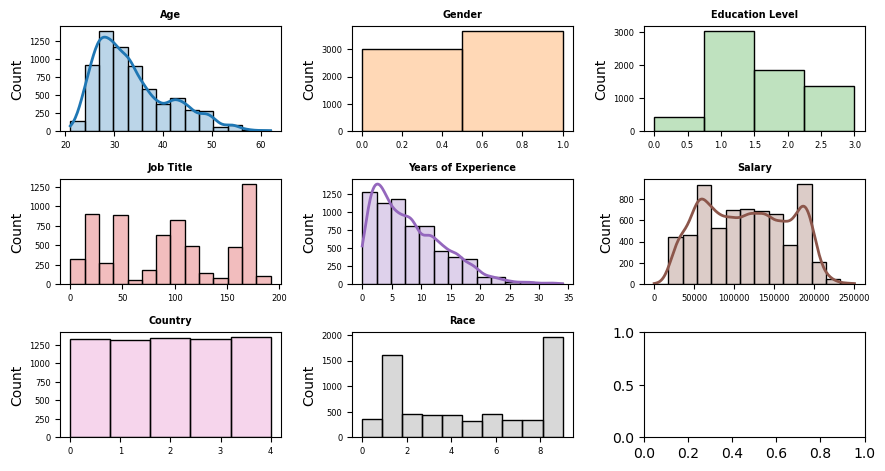

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
for i, colum in enumerate(data2.iloc[:, : 8]):
    if pd.get_dummies(data2[colum]).columns.values.shape[0] <= 12:
        num_bins = pd.get_dummies(data2[colum]).columns.values.shape[0] 
    else:
        num_bins = 14
    with_curve = ['Salary', 'Age', 'Years of Experience']
    if any(colum == var for var in with_curve):
        sns.histplot(
            data     = data2,
            bins     = num_bins,
            x        = colum,
            stat     = "count",
            kde      = True,
            color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
            line_kws = {'linewidth': 2},
            alpha    = 0.3,
            ax       = axes[i]
        )
    else:
        sns.histplot(
            data     = data2,
            bins     = num_bins,
            x        = colum,
            stat     = "count",
            color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
            alpha    = 0.3,
            ax       = axes[i]
        )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)

## Estadistica sobre los datos 

In [ ]:
def kurtosis(data): #Funcion para obtener la kurtosis
    
    kurtosis = sum((x - np.mean(data)) ** 4 for x in data) / (len(data)* np.sqrt(np.var(data)) ** 4)

    return kurtosis


In [ ]:
import scipy.stats as st
print("Estadistica de Salary:", "media", np.mean(data2['Salary']), "desviacion estandar", np.sqrt(np.var(data2['Salary'])) , "asimetría", st.skew(data2['Salary']),"curtosis", kurtosis(data2['Salary'])) 
print("Estadistica de age:", "media", np.mean(data2['Age']), "desviacion estandar", np.sqrt(np.var(data2['Age'])) , "asimetría", st.skew(data2['Age']),"curtosis", kurtosis(data2['Age'])) 
print("Estadistica de Years of Experience:", "media", np.mean(data2['Years of Experience']), "desviacion estandar", np.sqrt(np.var(data2['Years of Experience'])) , "asimetría", st.skew(data2['Years of Experience']),"curtosis", kurtosis(data2['Years of Experience'])) 


Estadistica de Salary: media 115307.17519449431 desviacion estandar 52802.86049319835 asimetría 0.05822007333517386 curtosis 1.8333653616384324
Estadistica de age: media 33.61056253740275 desviacion estandar 7.595426179335146 asimetría 0.9035624090972223 curtosis 3.1857776484236324
Estadistica de Years of Experience: media 8.077722920406941 desviacion estandar 6.028853832796941 asimetría 0.9654929590194796 curtosis 3.7128109111331815


## Mejor distribucion para cada variable 

In [ ]:
from fitter import Fitter 
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic'] 
#Atributo
fitter_yoe = Fitter(data2['Years of Experience'], distributions= distribuciones)
fitter_yoe.fit()
fitter_yoe.get_best(method = 'sumsquare_error')

fitter_age = Fitter(data2['Age'], distributions= distribuciones)
fitter_age.fit()
fitter_age.get_best(method = 'sumsquare_error')

fitter_salary = Fitter(data2['Salary'], distributions= distribuciones)
fitter_salary.fit()
fitter_salary.get_best(method = 'sumsquare_error')

{'beta': {'a': 2.28162187034553,
  'b': 2.6905738806945516,
  'loc': -360.9251751078708,
  'scale': 251786.29996575214}}

In [ ]:
print('La mejor distribucion para salary es ',  fitter_salary.get_best(method = 'sumsquare_error') )
print('La mejor distribucion para age es ',  fitter_age.get_best(method = 'sumsquare_error') )
print('La mejor distribucion para years of experience es ',  fitter_yoe.get_best(method = 'sumsquare_error') )

La mejor distribucion para salary es  {'beta': {'a': 2.28162187034553, 'b': 2.6905738806945516, 'loc': -360.9251751078708, 'scale': 251786.29996575214}}
La mejor distribucion para age es  {'beta': {'a': 2.9553035224015884, 'b': 591187.5126884335, 'loc': 20.55941570772879, 'scale': 2611181.629987646}}
La mejor distribucion para years of experience es  {'beta': {'a': 1.2454264202304017, 'b': 5.0842070339355026, 'loc': -0.0625690283767105, 'scale': 41.32924411035516}}


## Graficas de las distribuciones 

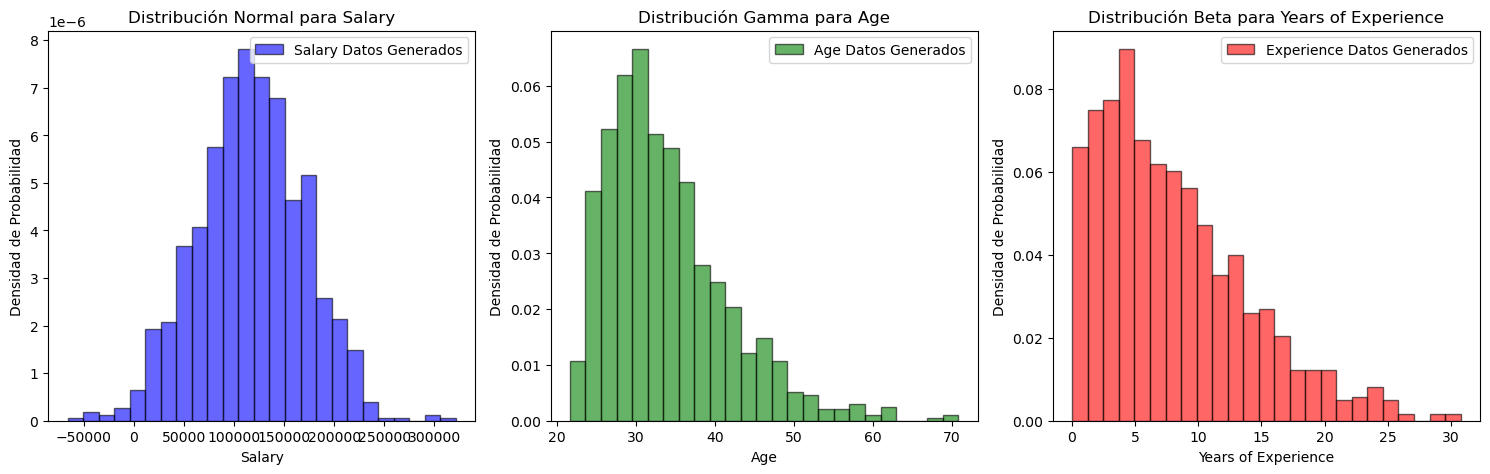

In [ ]:
from scipy.stats import norm, gamma, beta

# Parámetros de las distribuciones
params_salary = {'loc': 115307.17519449431, 'scale': 52802.86049319856}
params_age = {'a': 2.959547949456022, 'loc': 20.556502171474314, 'scale': 4.410814069978799}
params_experience = {'a': 1.2454264202304017, 'b': 5.0842070339355026, 'loc': -0.0625690283767105, 'scale': 41.32924411035516}

# Generar datos para las tres distribuciones
datos_salary = np.random.normal(**params_salary, size=1000)
datos_age = gamma.rvs(**params_age, size=1000)
datos_experience = beta.rvs(**params_experience, size=1000)

# Crear subplots para las tres distribuciones
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Trazar histograma y curva de densidad de probabilidad para "salary"
axs[0].hist(datos_salary, bins=25, density=True, alpha=0.6, color='b', label='Salary Datos Generados', edgecolor = 'k')
x_salary = np.linspace(min(datos_salary), max(datos_salary), 500)
axs[0].set_xlabel('Salary')
axs[0].set_ylabel('Densidad de Probabilidad')
axs[0].legend()
axs[0].set_title('Distribución Normal para Salary')

# Trazar histograma y curva de densidad de probabilidad para "age"
axs[1].hist(datos_age, bins=25, density=True, alpha=0.6, color='green', label='Age Datos Generados', edgecolor = 'k')
x_age = np.linspace(0, 50, 500)
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Densidad de Probabilidad')
axs[1].legend()
axs[1].set_title('Distribución Gamma para Age')

# Trazar histograma y curva de densidad de probabilidad para "years of experience"
axs[2].hist(datos_experience, bins=25, density=True, alpha=0.6, color='red', label='Experience Datos Generados', edgecolor = 'k')
x_experience = np.linspace(0, 1, 1000)
axs[2].set_xlabel('Years of Experience')
axs[2].set_ylabel('Densidad de Probabilidad')
axs[2].legend()
axs[2].set_title('Distribución Beta para Years of Experience')

plt.tight_layout()
plt.show()


## Metodo de filtrado 
Aqui se da el orden de importancia segun el metodo de filtrado. 

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE


x = data2['Salary']
entrenar = data2.drop(['Salary'], axis=1)
columnas = list(entrenar.columns.values)
seleccionadas = SelectKBest(f_classif, k = 'all').fit(entrenar, x)
score_values = np.sort(seleccionadas.scores_)[::-1]
columnas_ord = np.array(columnas)[np.argsort(seleccionadas.scores_)[::-1]]
columnas_ord
for i in range(len(columnas)):
    print('El valor de ', columnas_ord[i], 'es ', score_values[i])


El valor de  Years of Experience es  63.03785901559479
El valor de  Age es  25.87499459169732
El valor de  Education Level es  19.201646228033525
El valor de  Junior es  15.823139477304764
El valor de  Sales es  11.403588163192648
El valor de  Engineer es  8.543646679112662
El valor de  Project es  8.344502005440168
El valor de  Developer es  7.041331595941567
El valor de  HR es  6.614205473158326
El valor de  Coordinator es  6.322584836144223
El valor de  Senior es  6.142038431761636
El valor de  Manager es  5.926395107963988
El valor de  Scientist es  5.714179251098004
El valor de  Software es  5.438421786484301
El valor de  Job class es  5.323883877241233
El valor de  Job Title es  5.323883877241233
El valor de  Data es  4.356116758615332
El valor de  Gender es  4.306423146062751
El valor de  Marketing es  3.4618901306823227
El valor de  Director es  2.5485711078321662
El valor de  Analyst es  2.3675584767166966
El valor de  Designer es  1.7585930176591387
El valor de  Country es  0

## Graficas de correlacion 

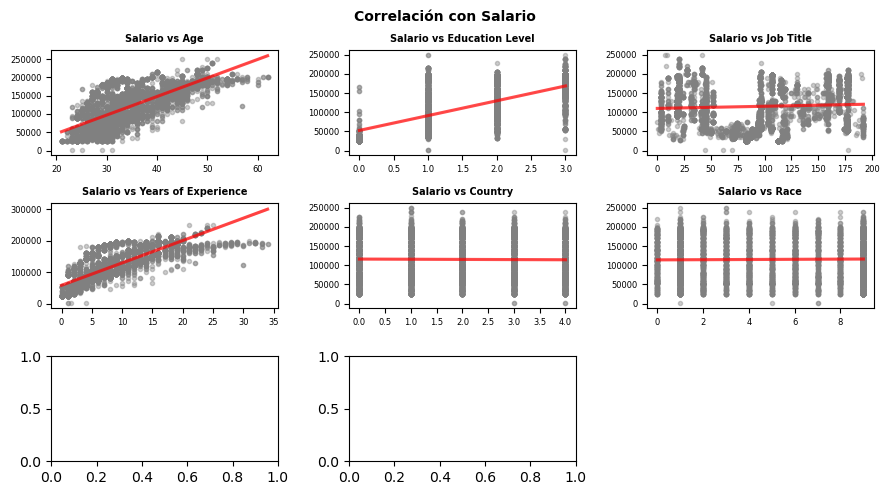

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas = data2.iloc[:, :8].select_dtypes(include=['float64', 'int']).columns
columnas = columnas.drop('Salary') # objetivo

for i, colum in enumerate(columnas):
    sns.regplot(
        x           = data2[colum],
        y           = data2['Salary'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"Salario vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con Salario', fontsize = 10, fontweight = "bold");

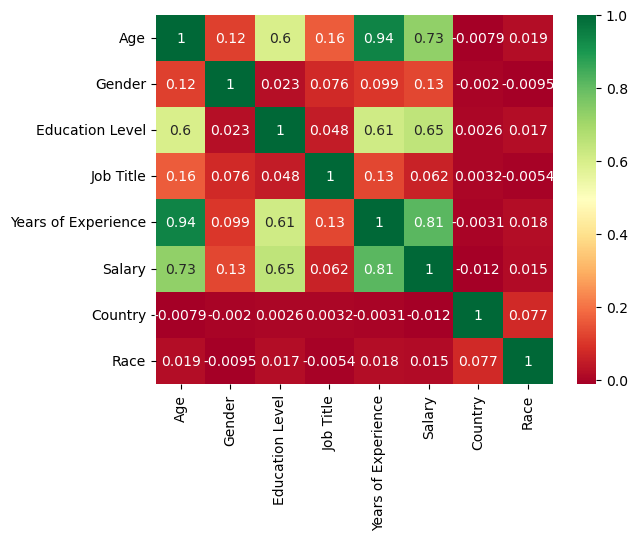

In [ ]:
def matrix_corr(data): 
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
#Matriz de correlacion para los datos 

matrix_corr(data2.iloc[:, : 8])


Tomaremos la decision de eliminar la columna 'Age' ya que tiene una correlacion muy grande con la caracteristica 'Years of Experience'

In [ ]:
data_clean = data2.copy()
data_clean = data_clean.drop(['Age'], axis = 1)
data_clean

,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Job class,Developer,Scientist,...,Manager,Senior,HR,Coordinator,Project,Designer,Software,Junior,Analyst,Data
0,1.0,1.0,177.0,5.0,90000.0,3,9,177.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,2.0,18.0,3.0,65000.0,4,5,18.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,3.0,145.0,15.0,150000.0,1,9,145.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,116.0,7.0,60000.0,4,5,116.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2.0,26.0,20.0,200000.0,4,1,26.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,0.0,3.0,34.0,20.0,200000.0,3,7,34.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6700,1.0,0.0,116.0,3.0,50000.0,0,2,116.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6701,0.0,1.0,42.0,4.0,55000.0,2,4,42.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6702,1.0,2.0,97.0,14.0,140000.0,2,6,97.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Exporta los datos como un archivo csv
mi_dataframe = pd.DataFrame(data_clean)
nombre_archivo = 'datos_limpios.csv'
mi_dataframe.to_csv(nombre_archivo, index=False) 
